## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Работа с данными, опубликованными на [портале открытых данных Министерства культуры](https://opendata.mkrf.ru/). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Цель проекта: 
- Изучить рынок российского кинопроката и выявить текущие тренды. 
- Уделить внимание фильмам, которые получили государственную поддержку. 
- Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.


 **Описание данных**  
 
 
Таблица `mkrf_moves` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` - название фильма
- `puNumber` - номер прокатного удостоверения
- `show_start_date` - дата премьеры фильма
- `type` - тип фильма
- `film_studio` - студия-производитель
- `production_country` - страна-производитель
- `director` - режиссер
- `producer` - продюсер
- `age_restriction` - возрастная категория
- `refundable_support` - объем возвратных средств государственной поддержки
- `nonrefundable_support` - объем невозвратных средств государственной поддержки
- `financing_source` - источник государственного финансирования
- `budget` - общий бюджет фильма
- `ratings` - рейтинг фильма на КиноПоиске
- `genres` - жанр фильма

Обратите внимание, что столбец `budget` уже включает в себя полный объем государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах
- `puNumber` - номер прокатного удостоверения
- `box_office` - сборы в рублях

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Пути к файлам:

`/datasets/mkrf_movies.csv` - данные о прокатных удостоверениях

`/datasets/mkrf_shows.csv` - данные о прокате в российских кинотеатрах

In [17]:
#Импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format 
import os

In [18]:
pth1 = '/datasets/mkrf_movies.csv'
pth2 = 'mkrf_movies.csv'
pth3 = '/datasets/mkrf_shows.csv'
pth4 = 'mkrf_shows.csv'
    
if os.path.exists(pth1):
    data1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data1 = pd.read_csv(pth2)
else:
    print('Something is wrong')

if os.path.exists(pth3):
    data2 = pd.read_csv(pth3)
elif os.path.exists(pth4):
    data2 = pd.read_csv(pth4)
else:
    print('Something is wrong')
    
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Для объединения таблиц необходимо, чтобы столбцы по которым объединяем, были одинакового типа. Попробуем столбец `puNumber` датафрейма `data1` перевести типа с `object` на `int`

In [19]:
#data1['puNumber'] = data1['puNumber'].astype('int')
print(data1[data1['puNumber']== 0]['puNumber'].count())
print(data2[data2['puNumber']== 0]['puNumber'].count())
data1.query('puNumber == "нет"')

0
0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Выдает ошибку, компилятор пишет что есть значение `нет`, выведем все строки с значением `нет`, а также проверим количество строк с значением 0 в `data1` и `data2`. Перезапишем `нет` на 0.

In [20]:
data1['puNumber'] = data1['puNumber'].replace('нет', 0, regex=True)
#Проверим 
data1.query('puNumber == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),0,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data1['puNumber'] = data1['puNumber'].astype('int')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [22]:
print('Количество строк и столбцов data1 до объединения - ', data1.shape)

Количество строк и столбцов data1 до объединения -  (7486, 15)


In [23]:
data = data1.merge(data2, on = 'puNumber', how = 'left')
data = data.reset_index(drop = True)
print('Количество строк и столбцов после объединения - ', data.shape,'\n')
data.info()


Количество строк и столбцов после объединения -  (7486, 16) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 

`(7486, 15)` - Количество строк и столбцов `data1` до объединения

`(7486, 16) ` - После объединения двух таблиц

Соответственно, все объекты из датасета `mkrf_movies` вошли в получившийся датафрейм

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [24]:
display(data.sample(5))
display(data.describe())
data.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7302,Побег из Шоушенка,121029519,2019-10-18T12:00:00.000Z,Художественный,"Уорнер Броз. Пикчерз, Кастл Рок Интертейнмент",США,Фрэнк Дарабонт,"Лиз Глоцер, Дэвид В.Лестер, Ники Марвин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,9.1,драма,NaN
1185,Шарль Гуно. Фауст /По первой части одноименног...,126000413,2013-02-21T12:00:00.000Z,Прочие,Опус Арт,Великобритания,Дэвид МакВикар,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6466,А.Адан. Жизель. Хореография Матса Эка,126002718,2018-11-27T12:00:00.000Z,Прочие,"Сверижес Телевижн А Бэ, Эр Эм Артс",Швеция,хореограф Матс Эк,Манс Ретерсвард,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7291,Курьезы,111017619,2019-10-18T12:00:00.000Z,Художественный,"АНО ""Кинофорум""",Россия,А.Мышкин,С.Новожилов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,NaN,NaN
6481,Де фак-то,112014318,2018-12-04T12:00:00.000Z,Документальный,Обермаер Е.В.,"Россия, Австрия",Е.Обермаер (псевдоним Е.Шапиро-Обермаер),Е.Обермаер (псевдоним Е.Шапиро-Обермаер),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.4,документальный,NaN


,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,"7,486.00",332.00,332.00,332.00,"3,158.00"
mean,"135,178,527.64","11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"38,382,177.41","24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,0.00,0.00,0.00,0.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**По выведенным данным, видим :**
- Что нужно `puNumber` переименовать в "удобный" вид, то есть в `pu_number`, убрав верхний регистр и добавив нижнее подчеркивание
- `show_start_date` должен иметь тип данных `DateTime` так как имеет данные по дате и времени;
- Объем возвратных средств государственной поддержки `refundable_support` изменить на `float32`
- Объем невозвратных средств государственной поддержки `nonrefundable_support` изменить на `float32`
- Общий бюджет фильма `budget` изменить на `float32`
- Рейтинг фильма на КиноПоиске `ratings` должен иметь тип `float16`


Для начала, переименуем столбец `puNumber` на `pu_number`, убрав верхний регистр и добавив нижнее подчеркивание

In [25]:
#Переименуем
data = data.rename(columns = {'puNumber': 'pu_number'})
#Проверим
data.columns.tolist()

['title',
 'pu_number',
 'show_start_date',
 'type',
 'film_studio',
 'production_country',
 'director',
 'producer',
 'age_restriction',
 'refundable_support',
 'nonrefundable_support',
 'budget',
 'financing_source',
 'ratings',
 'genres',
 'box_office']

Далее изменим типы данных столбцов `show_start_date`, `refundable_support`, `nonrefundable_support`,  `budget` как было описано выше

In [26]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")
data['refundable_support'] = data['refundable_support'].astype('float32')
data['nonrefundable_support'] = data['nonrefundable_support'].astype('float32')
data['budget'] = data['budget'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

Далее для изменения типа данных о рейтинге фильма на КиноПоиске `ratings`, выведем все уникальные значения этого столбца

In [27]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что есть процентные значения, которые нужно переобразовать в тип с плавающей точкой, для этого удалим знак "%" и переведем в тип данных с плавающей точкой

In [28]:
data['ratings'] = data['ratings'].str.replace("%", "")
data['ratings'] = data['ratings'].astype('float16')
data.info()
#data['ratings'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

Далее значения которые больше 10 умножим на 0.1, округлив значение до десятых

In [29]:
data.loc[data['ratings'] > 10, 'ratings'] = round(data['ratings'] * 0.1, 1)
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8], dtype=float16)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Выведем количество всех пропусков по столбцам датафрейма `data`

In [30]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Построим столбчатую диаграмму, чтобы лучше рассмотреть количество пропусков по столбцам

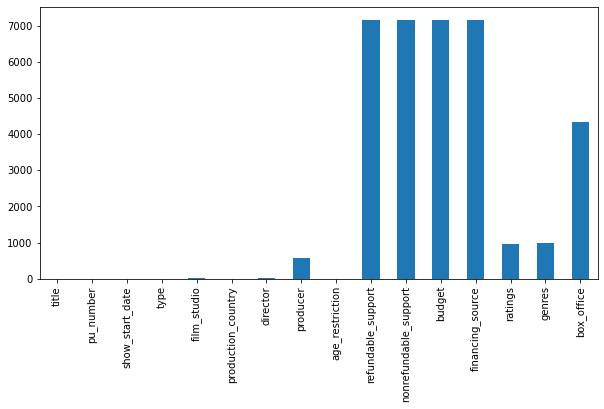

In [31]:
(data.isna().sum()).plot(y = 'title', kind= 'bar', figsize = (10,5));

Выведем долю пропусков,для наглядности, закрасив градиентом.

In [32]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.200000
production_country,0.000000
director,0.100000
producer,7.600000
age_restriction,0.000000
refundable_support,95.600000


Пропуски имеются в 11ти столбцах:
- `film_studio`
- `production_country`
- `director`
- `producer`
- `refundable_support`
- `nonrefundable_support`
- `budget`
- `financing_source`
- `ratings`
- `genres`
- `box_office`

По результатам вывода, видно что пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` имеют одинаковое количество. Проверим находятся ли они в одних и тех же строках, посчитаем количество строк у которых есть пропуски во всех данных столбцах

In [33]:
data.loc[(data['refundable_support'].isna() == True) & \
         (data['nonrefundable_support'].isna() == True) & \
         (data['budget'].isna() == True)& (data['financing_source'].isna() == True)]['title'].count()

7154

In [34]:
data.query('production_country.isna() == True')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Страна-производитель Ералаша и Мульта личности - Россия, заполним это вместо пропуска

In [35]:
data['production_country'] = data['production_country'].fillna('россия') 
data['production_country'].isna().sum()

0

Для пропусков в столбце жанров `geners`, заполним некоторые исходя из типа фильма. То есть
- фильмы с типом "Анимационный" запишем жанр - "мультфильм"
- фильмы с типом "Документальный" запишем жанр - "документальный"

Но для начала, рассмотрим все уникальные значения столбца `type`

In [36]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В результате вывода всех уникальных значений столбца, видим что значение `Художественный` и `Анимационный` встречается 2 раза из за лишнего пробела в начале значения

Также рассмотрим 10 рандомных значений столбца `title`

In [37]:
data['title'].sample(10)

3115                      Крид: Наследие Рокки
5891                   Сарыал. Дорога к солнцу
534     Мартовские иды /По пьесе Бо Уиллимона/
5113                                  Будущее.
312                 Хроники Хуаду: лезвие розы
852     Вспомнить все /По произведению Ф.Дика/
65                             Бархатный сезон
3625                           Я, Дэниел Блэйк
171                     Звонят, откройте дверь
293                         Стертая реальность
Name: title, dtype: object

В результате нескольких выводов, можно определить, что в значениях `title` встречаются ячейки с лишними знаками в конце или в начале названия фильма, такие как ` `,`!`,`_`,`.`,`-`

Для того чтобы избавиться от лишних пробелов в начале или в конце ячейки, запишем функцию которая удаляет пробелы и следующие знаки ` `,`!`,`_`,`.`, `-` находящиеся в начале или в конце яйчеки, а также приводит к нижнему регистру

In [38]:
def correct(data):
    return data.str.lower().str.strip(' !_.-')

Рассмотрим уникальные значения столбца `type` после использования функции `correct`

In [39]:
data['type'] = correct(data['type'])

In [40]:
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

Далее уберем все верхние регистры с столбцов, удалим лишние пробелы и значки в начале и в конце строки, используя функцию `correct`

In [41]:
data['title'] = correct(data['title'])
data['film_studio'] = correct(data['film_studio'])
data['production_country'] = correct(data['production_country'])
data['director'] = correct(data['director'])
data['producer'] = correct(data['producer'])
data['genres'] = correct(data['genres'])
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN


Заполним некоторые пропуски в столбце жанра `geners`, 
- Фильмы у которых в наименовании фильма есть слово "концерт", жанром `"концерт"`
- Все фильмы с типом "анимационный" запишем как жанр "мультфильм"
- Фильмы с типом "документальный" запишем жанр "документальный"

In [42]:
print(data.genres.isna().sum())
data.loc[(data['title'].str.contains("концерт") == True) & (data['genres'].isna() == True), 'genres'] = "концерт"
data.loc[(data['type'] == "анимационный") & (data['genres'].isna() == True), 'genres'] = 'мультфильм'
data.loc[(data['genres'].isna() == True) & (data['type'] == "документальный"), 'genres'] = 'документальный' 
print(data.genres.isna().sum())

976
583


Итого, заполнили 393 пропуска в столбце `geners`, остальные пропуски этого столбца оставим. Выведем количество всех пропусков по столбцам датафрейма `data`, после обработки.

In [43]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    583
box_office               4328
dtype: int64

In [44]:
data.query('director.isna()== True')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"три звезды. концерт в waldbuhne theater, берли...",126003512,2012-12-04 12:00:00,прочие,райзинг алтернатив,великобритания,NaN,вальдбюне театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,концерт,"44,350.00"
1735,помпеи. британский музей,126003413,2013-09-11 12:00:00,прочие,"мортускрин, британский музей",великобритания,NaN,британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,зур концерт (большой концерт),217027010,2010-06-24 12:00:00,художественный,"ооо ""барс рекордс""",россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,концерт,NaN
4052,"ганс сэйфуллин ""авылым чишмэлэре. ганс сэйфулл...",217017310,2010-04-22 12:00:00,художественный,"ооо ""барс-рекордс""",россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,концерт,NaN
4298,изге вэли (святой валентин),217020610,2010-05-20 12:00:00,художественный,"ооо ""барс рекордс""",россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,bon jovi. the circle tour,126001710,2010-11-11 12:00:00,прочие,эншутц интертейнмент груп,сша,NaN,эншутц интертейнмент груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,мульт личности. выпуск 5,214000410,2010-01-25 12:00:00,художественный,NaN,россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,георг фридрих гендель. мессия. оратория. корол...,126001111,2011-04-25 12:00:00,прочие,опус арт,великобритания,NaN,короевский колледж кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,питер гэбриэл и new blood orchestra 3d,126002711,2011-11-11 12:00:00,прочие,омниверс визион,великобритания,NaN,омниверс визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Рассматривая результат вывода всех строк с пустым значением в `director`, можно определить что почти все фильмы - концерты. Их можно удалить

In [45]:
#Выведем количество строк и столбцов до удаления строк
print(data.shape)
data = data.query('director.isna() == False')
data = data.reset_index(drop = True)
#Проверим, и выведем количество строк и столбцов после удаления
data.shape

(7486, 16)


(7477, 16)

К сожалению, остальные пропуски не можем заполнить, так как не известно какими данными их можно заполнить.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала можно проверить на наличие явных дубликатов

In [46]:
data.duplicated().sum()

0

Рассмотрим дубликаты по номеру прокатного удостоверения `pu_number`

In [47]:
data.loc[data['pu_number'].duplicated() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4632,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5059,анализируй то,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Проверим, сходятся ли номера с названием фильма и его характеристикой?

In [48]:
data.loc[(data['pu_number'] == 221154310) | (data['pu_number'] == 221054410)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4631,как жениться и остаться холостым,221154310,2010-12-17 12:00:00,художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4632,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00,художественный,"константин фильм, а эр ди дегето фильм, дюне ф...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5058,анализируй это,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5059,анализируй то,221054410,2010-05-25 12:00:00,художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Фильмы с одинаковыми номерами прокатного удостоверения оказались совершенно разными фильмами.

По отношению к первыми двум фильмам, скорее всего просто перепутали номера. 

А по отношению к последним двум фильмам, скорее всего решили что это один и тот же фильм. Но это не так, так как наименования, имя режиссера, продюссера итд отличаются друг от друга.

Так что, это не дубликаты и их удалять не будем

Далее необходимо рассмотреть дубликаты по названию фильма и режиссеру

In [49]:
data.loc[data.duplicated(subset = ['title', 'director']) == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,алекс и эмма,221004616,2016-02-09 12:00:00,художественный,"эскейп артистс, франчайз пикчерз, рейнер-грэйс...",сша,роб райнер,"тодд блэк, элан грейсман, джереми левен, роб р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,гарри поттер и орден феникса /по роману дж.к.р...,121026316,2016-09-23 12:00:00,художественный,"уорнер бразерс, хэйдей филмз",сша - великобритания,дэвид йетс,"дэйвид баррон, дэйвид хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
113,гарри поттер и узник азкабана /по роману дж.к....,121026116,2016-09-23 12:00:00,художественный,"хэйдей филмз, 1492 пикчерз, уорнер бразерс",сша,альфонсо куарон,майкл барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7256,альдабра: путешествие по таинственному острову,126003719,2019-09-30 12:00:00,прочие,старлайт пикчерз,чехия,стив лихтаг,"петр келлер, роберт шнайдер, леопольдо гоут",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.80,"семейный,приключения,документальный",NaN
7271,матрица,121028619,2019-10-05 12:00:00,художественный,"уорнер бразерс, вилладж роадшоу пикчерз, грушо...",сша,"ларри вачовски, энди вачовски",джоэл сильвер,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.50,"фантастика,боевик",NaN
7292,ночь живых мертвецов,121029119,2019-10-30 12:00:00,художественный,"имейдж тен, лаурель групп, маркет скьяр продакшнз",сша,джордж а.ромеро,"расселл страйнер, карл хардмен",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.30,"ужасы,триллер",NaN
7304,безумный макс: дорога ярости,121030019,2019-12-06 12:00:00,художественный,уорнер бразерс пикчерс,"австралия, сша",джордж миллер,"джордж миллер, даг митчелл, брюс берман",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.80,"боевик,фантастика,приключения",NaN


717 rows × 16 

Всего вышло 717 дубликатов притом все они оказались с разными номерами прокатного удостоверения. Возможно, это связано с тем, что забывали что этот фильм уже внесен в таблицу данных или были допущены ошибки при написании номера прокатного удостоверения. Или же, вследствии получения нескольких прокатных удостоверений на один и тот же фильм.

Удалим все неявные дубликаты и сбросим индексы

In [50]:
print(data.shape)
data = data.loc[data.duplicated(subset = ['title', 'director']) == False]
data = data.reset_index(drop = True)
data.shape

(7477, 16)


(6759, 16)

Выведем информацию о данных после очистки от дубликатов

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6759 non-null   object        
 1   pu_number              6759 non-null   int32         
 2   show_start_date        6759 non-null   datetime64[ns]
 3   type                   6759 non-null   object        
 4   film_studio            6743 non-null   object        
 5   production_country     6759 non-null   object        
 6   director               6759 non-null   object        
 7   producer               6206 non-null   object        
 8   age_restriction        6759 non-null   object        
 9   refundable_support     330 non-null    float32       
 10  nonrefundable_support  330 non-null    float32       
 11  budget                 330 non-null    float32       
 12  financing_source       330 non-null    object        
 13  rat

#### Шаг 2.4. Изучите столбцы которые содержат категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

В категориальных столбцах встречались такие проблемы как лишний пробел в начале или в конце строки, от которых мы ранее избавлялись используя функцию `correct`. Для проверки можем вывести все уникальные значения столбца `type` после использования функции `correct`

In [52]:
data['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', 'музыкально-развлекательный'], dtype=object)

Рассмотрим все уникальные значения других категориальных столбцов

In [53]:
data['film_studio'].unique()

array(['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
       'киностудия "мосфильм"',
       'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
       ...,
       'дэниел гродник продакшнз, вандерфилм медиа корпорэйшн, импринт интертейнмент, вор хорс интертейнмент, пимиента',
       'никелодеон анимейшн студиос, спин мастер',
       'анимаккорд лтд., ооо студия "анимаккорд"'], dtype=object)

In [54]:
data['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия-великобритания', 'великобритания - италия',
       'чехословакия', 'сша - франция - турция', 'новая зеландия',
       'канада - франция - испания', 'сша-германия',
       'сша - великобритания', 'великобритания', 'сша - германия',
       'франция - мексика - сша', 'россия, казахстан, сша',
       'ссср, швеция', 'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания-сша-германия-кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша - франция', 'сша - япония - франция - великобритания',
       'гонконг - сингапур - таиланд - великобритания', 'сша-канада',
       'франция - италия - великобритания - сша', 'франция - сша',
       'ирландия-великобритания-германия', 'чехия', 'сша-австралия',
       'ссср, финляндия', 'сша-франция-великобритания-австрия',
       'сша - бельгия', 'сша - ирландия - великобритания',
       'великобритания - сша',
       'люксембург - нидерл

In [55]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [56]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [57]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Общая проблема почти всех категориальных столбцов - в перечислении значений в одной ячейке либо через запятую, либо через тире

#### Шаг 2.5. Изучить столбцы, которые хранят количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Для начала выведем список характерных значений количественных значений датафрейма - count, mean, std(стандартное отклонение), min, первый, второй, третий квартили, max

In [58]:
data[['refundable_support','nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,330.00,330.00,330.00,"3,013.00"
mean,"11,936,363.00","48,914,224.00","127,045,400.00","75,665,756.65"
std,"24,974,918.00","60,110,464.00","188,952,416.00","237,844,548.74"
min,0.00,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00","128,650.00"
50%,0.00,"30,000,000.00","68,649,920.00","2,446,886.00"
75%,"15,000,000.00","40,000,000.00","140,020,048.00","23,720,901.47"
max,"180,000,000.00","400,000,000.00","2,305,074,176.00","3,073,568,690.79"


В результате вывода характерных значений можно определить, что стандартное отклонение у столбцов очень большое, это вызвано за счет того что данные сильно разнятся

Построим гистограммы для столбцов `refundable_support`, `nonrefundable_support`, `budget`, `box_office`

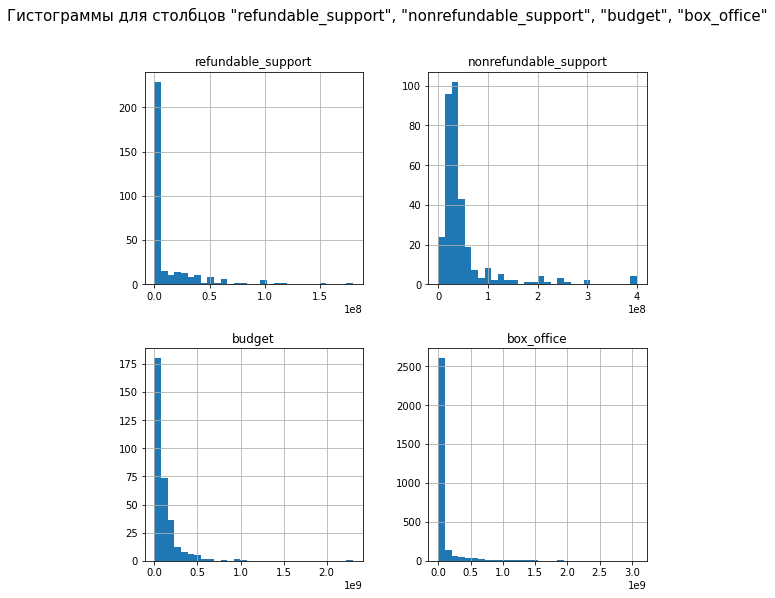

In [59]:
data[['refundable_support','nonrefundable_support', 'budget', 'box_office']].hist(bins = 30, figsize=(9, 9))
plt.suptitle('Гистограммы для столбцов "refundable_support", "nonrefundable_support", \
"budget", "box_office"', fontsize=15)
plt.show()

Построим межквартильный размахи для столбцов `refundable_support`, `nonrefundable_support`, `budget`, `box_office`

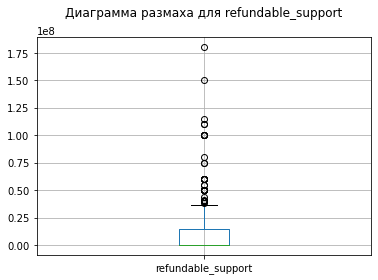

In [60]:
data.boxplot('refundable_support')
plt.title('Диаграмма размаха для refundable_support\n')
plt.show()

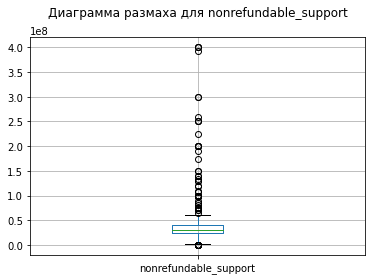

In [61]:
data.boxplot('nonrefundable_support')
plt.title('Диаграмма размаха для nonrefundable_support\n')
plt.show()

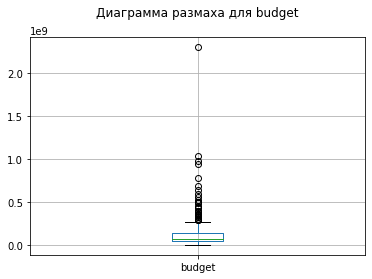

In [62]:
data.boxplot('budget')
plt.title('Диаграмма размаха для budget\n')
plt.show()

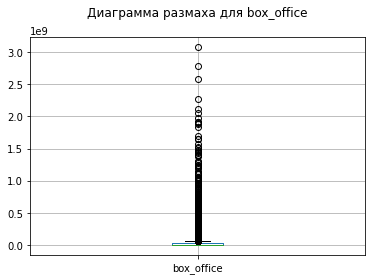

In [63]:
data.boxplot('box_office')
plt.title('Диаграмма размаха для box_office\n')
plt.show()

По отображенным результатам можно определить какие значения сильно отдалены от остальных, посчитаем количество этих значений

In [64]:
print(data[(data['refundable_support'] > 100000000)]['title'].count())
print(data[data['nonrefundable_support'] > 250000000]['title'].count())
print(data[data['budget'] > 1000000000]['title'].count())
data[data['box_office'] > 2500000000]['title'].count()

5
7
2


3

В сумме выходит 17, что не превышает 10% от общего количества данных

In [65]:
print(data.title.count())
data = data.query('(refundable_support < 100000000 & nonrefundable_support < 250000000 & budget < 1000000000 & box_office < 2500000000) | (refundable_support.isna() == True) | (nonrefundable_support.isna() == True) | (budget.isna() == True) | (box_office.isna() == True)')
print(data.title.count())
data = data.reset_index(drop = True)

6759
6743


Удалилось 16 строк, скорее всего так как некоторые значения совпадают  

Выведем гистограмму по обновленным данным

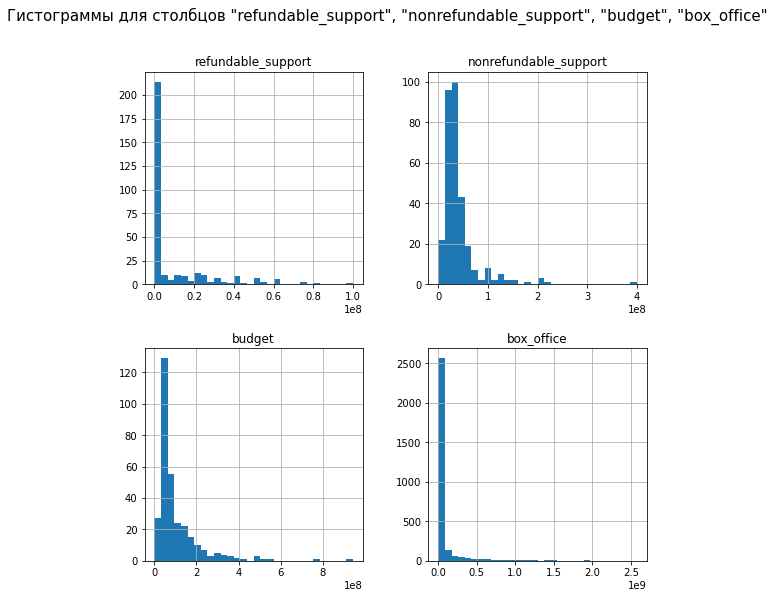

In [66]:
data[['refundable_support','nonrefundable_support', 'budget', 'box_office']].hist(bins = 30, figsize=(9, 9))
plt.suptitle('Гистограммы для столбцов "refundable_support", "nonrefundable_support", "budget", "box_office"', fontsize=15)
plt.show()

А также выведем матрицу рассеяния

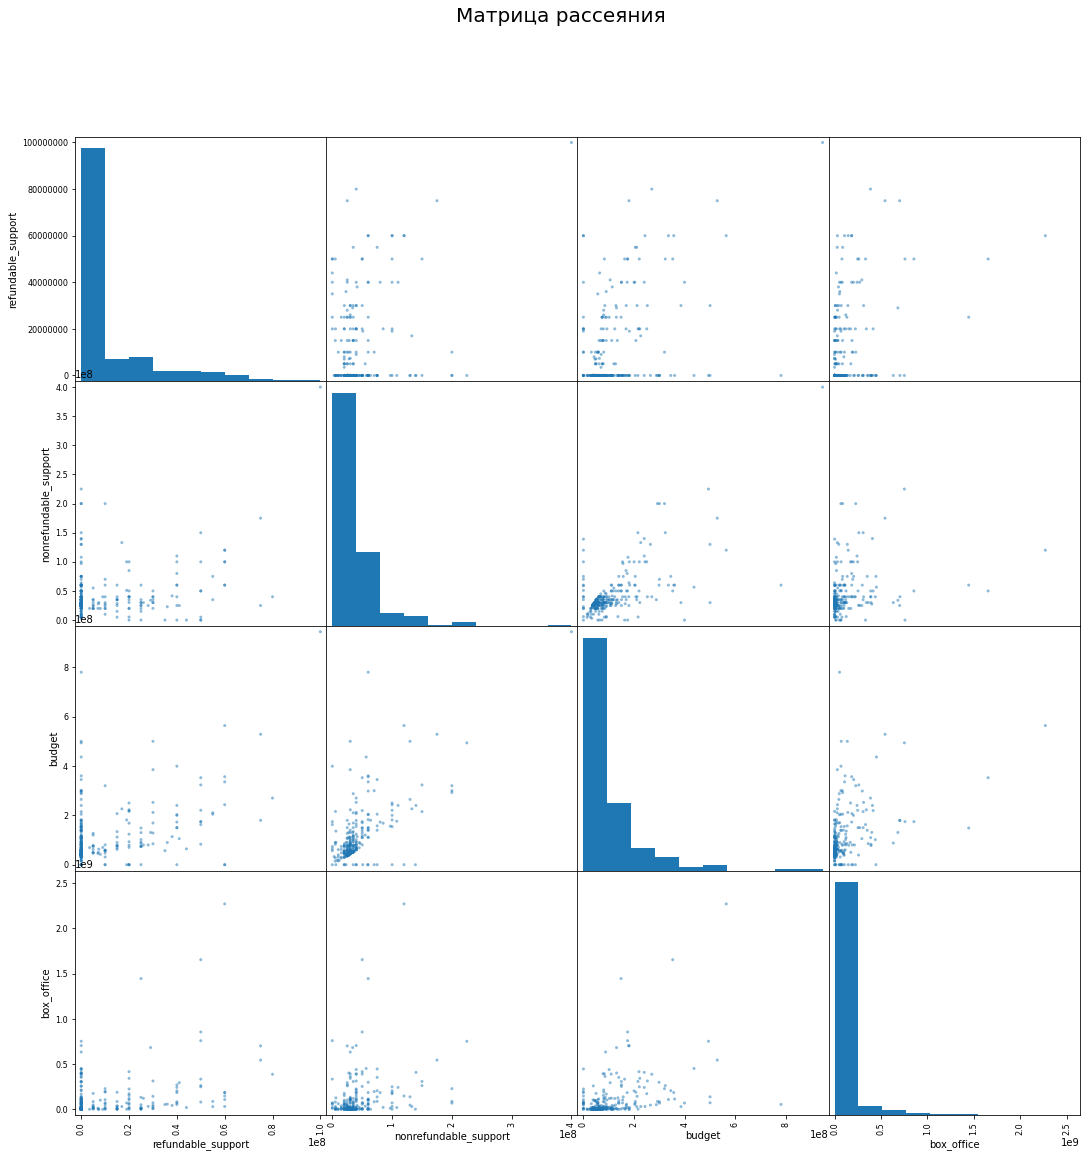

In [67]:
pd.plotting.scatter_matrix(data[['refundable_support','nonrefundable_support', 'budget',\
                                 'box_office']], figsize = (18, 18))
plt.suptitle('Матрица рассеяния', fontsize = 20)
plt.show()

In [68]:
print('Коэффициент корелляции между общим бюджетом и \nобъемом возвратных средств поддержки \t', \
      data['budget'].corr(data['refundable_support']))
print('объемом невозвратных средств поддержки\t', data['budget'].corr(data['nonrefundable_support']))
print('сборов в рублях\t\t\t\t', data['budget'].corr(data['box_office']))

Коэффициент корелляции между общим бюджетом и 
объемом возвратных средств поддержки 	 0.46657882944059176
объемом невозвратных средств поддержки	 0.6567224442266867
сборов в рублях				 0.451628322878901


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743 entries, 0 to 6742
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6743 non-null   object        
 1   pu_number              6743 non-null   int32         
 2   show_start_date        6743 non-null   datetime64[ns]
 3   type                   6743 non-null   object        
 4   film_studio            6727 non-null   object        
 5   production_country     6743 non-null   object        
 6   director               6743 non-null   object        
 7   producer               6190 non-null   object        
 8   age_restriction        6743 non-null   object        
 9   refundable_support     314 non-null    float32       
 10  nonrefundable_support  314 non-null    float32       
 11  budget                 314 non-null    float32       
 12  financing_source       314 non-null    object        
 13  rat

Также проверим столбцы `pu_number` на наличие аномальных значений, для этого выведем отсортированный по возрастанию список всех значений


In [70]:
data.sort_values(by = 'pu_number')['pu_number']

1628            0
4206      1811096
3632    111000110
4247    111000111
668     111000112
          ...    
265     226008615
1710    226014714
3961    226017410
3658    226019110
920     231001012
Name: pu_number, Length: 6743, dtype: int32

Аномальным значением считается `pu_number` = `1811096`, возможно некоторые цифры не записали, удалим этот столбец

In [71]:
print(data.title.count())
data = data.loc[data['pu_number'] != 1811096]
print(data.title.count())
data = data.reset_index(drop = True)

6743
6742


А также проверим `show_start_date` на наличие даты из будущего, для этого рассмотрим его минимальное и маскимальные значения

In [72]:
display(data['show_start_date'].min())
data['show_start_date'].max()

Timestamp('2010-01-11 12:00:00')

Timestamp('2019-12-30 12:00:00')

А также проверим, не превышает ли сумма государственной поддержки бюджет фильма.

In [73]:
print(len(data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]))
data.loc[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

16


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1863,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
1868,дуxless 2,111000415,2015-01-26 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2236,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2294,бармен,111009615,2015-05-26 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2368,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2430,тряпичный союз,111010215,2015-06-08 12:00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2525,срочно выйду замуж,111017115,2015-09-30 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2605,помню - не помню,111004916,2016-03-01 12:00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
2769,любовь с ограничениями,111008216,2016-04-29 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3359,чудо-юдо,114001817,2017-06-27 12:00:00,анимационный,"ооо ""кинофирма""",россия,а.лукичев,"ооо ""кинофирма""",«6+» - для детей старше 6 лет,"20,000,000.00","20,000,000.00",0.00,Фонд кино,5.20,"мультфильм,фэнтези,семейный","55,108,014.76"


Таких строк оказалось 16, на всех строках в столбце `budget` стоит `0`. Данные по этому столбцу заполнены `0`, возможно из за того что сам бюджет не известен

По полученным выше результатам, видно, что :
- Коэффициент корелляции связи общего бюджета от объема возвратных средств поддержки и сборов в рублях 0.46, 0.45, то есть нет слишком сильной связи между ними.
- Коэффициент корелляции связи общего бюджета от объема невозвратных средств поддержки равна 0.65, что означает, что связь есть но она чуть выше предыдущих, а также оно означает что с ростом первой величины, будет расти и вторая величина
- Также это наглядно видно на матрице рассеяния - чем больше объем невозвратных средств государственной поддержки фильма, тем больше общий бюджет фильма
- В остальных случаях связь слабая, но так же можно разглядеть что с ростом одной величины, растет и вторая
- Аномальным значением столбца `pu_number` считается - 1811096, возможно некоторые цифры случайно пропустили


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [74]:
data['year'] = data['show_start_date'].dt.year
#Проверим
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,остановился поезд,111013816,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016
4,любовь и голуби,111007013,2013-10-18 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [75]:
def splited(value):
    return value.str.split(',', expand=True)[0]

data['main_genre'] = splited(data['genres'])
data['main_director'] = splited(data['director'])
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,main_director
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,боевик,кевин костнер
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,драма,е.матвеев
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,фантастика,тимур бекмамбетов
3,остановился поезд,111013816,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN,2016,драма,в.абдрашитов
4,любовь и голуби,111007013,2013-10-18 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00",2013,мелодрама,в.меньшов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [76]:
data['support_share'] = (data['refundable_support'] + data['nonrefundable_support'])/data['budget'] * 100

Выведем информацию о датафрейме для проверки выполненного действия 

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6742 entries, 0 to 6741
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6742 non-null   object        
 1   pu_number              6742 non-null   int32         
 2   show_start_date        6742 non-null   datetime64[ns]
 3   type                   6742 non-null   object        
 4   film_studio            6726 non-null   object        
 5   production_country     6742 non-null   object        
 6   director               6742 non-null   object        
 7   producer               6190 non-null   object        
 8   age_restriction        6742 non-null   object        
 9   refundable_support     314 non-null    float32       
 10  nonrefundable_support  314 non-null    float32       
 11  budget                 314 non-null    float32       
 12  financing_source       314 non-null    object        
 13  rat

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Для начала выведем таблицу количества всех фильмов выходивших в прокат в кинотеатрах, сгруппированных по годам. Для наглядности, закрасим градиентом.

In [78]:
data_year = data.groupby('year').agg({'box_office':'count'})
display(pd.DataFrame({'Количество фильмов':data_year['box_office'] })\
        .style.format('{:.2f}').background_gradient('coolwarm'))

,Количество фильмов
year,
2010,87.00
2011,97.00
2012,115.00
2013,176.00
2014,251.00
2015,429.00
2016,492.00
2017,354.00
2018,472.00


В результате закрашивания градиентом, сразу можно увидеть что:
- Максимальное количество фильмов выходило в 2019-м году
- Минимальное количество фильмов выходило в 2010-м году


Построим столбчатую диаграмму, чтобы лучше рассмотреть изменение количества фильмов с каждым годом

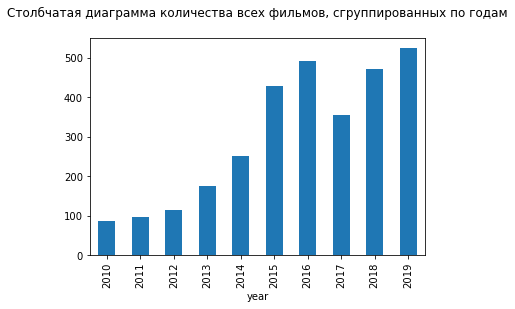

In [79]:
data_year['box_office'].plot(kind= 'bar')
plt.title('Столбчатая диаграмма количества всех фильмов, сгруппированных по годам\n')
plt.show()

- Самое больше количество фильмов выпало на 2016 и 2019-й год.
- В 2017-м году были резкие падения количества фильмов. Возможно это связано с потерей данных 
- В остальных годах количество умеренно росло 

Далее выведем долю, которую составляют фильмы с указанной информацией о прокате в кинотеатрах. Для наглядности, также закрасим градиентом и построим столбчатую диаграмму

In [80]:
data_year['all'] = data.groupby('year').agg({'title':'count'})
data_year['share'] = data_year['box_office']/data_year['all']*100
display(pd.DataFrame({'Доля проката %':data_year['share'] })\
        .style.format('{:.2f}').background_gradient('coolwarm'))

,Доля проката %
year,
2010,11.60
2011,20.73
2012,22.29
2013,30.03
2014,34.91
2015,65.20
2016,64.65
2017,71.23
2018,53.70


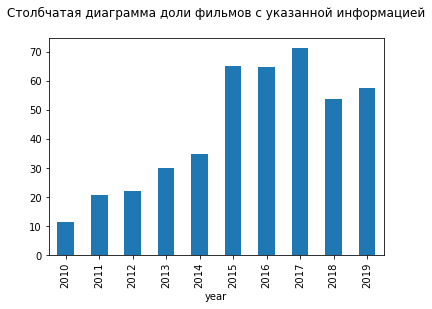

In [81]:
data_year['share'].plot(kind= 'bar')
plt.title('Столбчатая диаграмма доли фильмов с указанной информацией\n')
plt.show()

Исходя из данных выведенных выше, можно определить что доля фильмов с указанной информацией о прокате кинотеатрах:
- Самая минимальная доля фильмов с указанной информацией была в 2010 году
- Полнее всего представлена информация о прокате в кинотеатрах в 2017 году
- В течении с 2010 по 2017 год доля указанной информация о прокате фильмов в кинотеатрах с каждым годом росла
- В 2017 году доля резко упала, возможно это из за потери данных

Далее изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной, а в каком году максимальной

In [82]:
data_year['box_office_sum'] = data.groupby('year').agg({'box_office':'sum'})
display(pd.DataFrame({'Сумма сборов':data_year['box_office_sum'] })\
        .style.format('{:.2f}').background_gradient('coolwarm'))

,Сумма сборов
year,
2010,2128710.00
2011,13849875.00
2012,6420761.00
2013,29768531.20
2014,7284432741.50
2015,31830717954.67
2016,40507191754.12
2017,44681840460.51
2018,46587826236.83


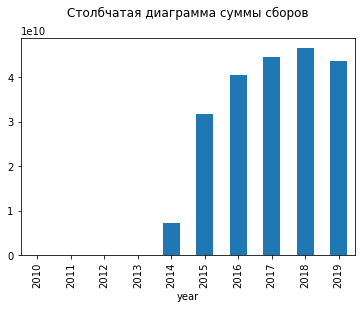

In [83]:
data_year['box_office_sum'].plot(kind= 'bar')
plt.title('Столбчатая диаграмма суммы сборов\n')
plt.show()

По полученным данным таблицы и графика видно, что:
- Максимальную сумму общего сбора получили в 2018 году
- Минимальную сумму общего сбора получили в 2010 году, вполне возможно это из за низкого значения количества фильмов этого года, а также и низкой доли фильмов с указанной информацией о прокате фильма

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.

Выведем сводную таблицу с средним и медианным значением общего сбора для каждого года, для наглядности также закрасим градиентом.


In [84]:
pd.DataFrame({'Среднее значение':data.pivot_table(index = 'year', \
values = 'box_office', aggfunc = ('mean', 'median'))['mean'] , \
'Медиана ':data.pivot_table(index = 'year', values = 'box_office', \
aggfunc = ('mean', 'median'))['median'] }).style.format('{:.2f}').background_gradient('coolwarm')

,Среднее значение,Медиана
year,,
2010,24467.93,1820.00
2011,142782.22,3000.00
2012,55832.70,6655.00
2013,169139.38,3565.00
2014,29021644.39,22660.00
2015,74197477.75,4321194.60
2016,82331690.56,3597517.70
2017,126219888.31,9898090.00
2018,98703021.69,8730277.53


Дополнительно для наглядности и примера, рассмотрим диаграмму размаха для величины `box_office` по 2019 году

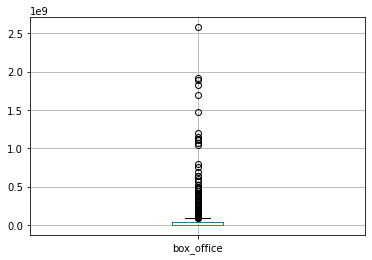

In [85]:
data.loc[data['year'] == 2019].boxplot('box_office')
plt.show()

В результате можно определить, что значения столбца `box_office` имеют сильный разброс данных, в итоге среднее арифметическое значительно больше медиианного значения

- Самый высокий общий сбор выпадает на 2017й год
- С 2010 по 2014 год самые минимальные значения, возможно это связано с отсутствием данных в столбце общего сбора
- У фильмов 2018 года хороший общий сбор
- В 2019-м году медианное значение общего сбора упала, что означает что значения общего сбора упали по сравнению с 2018 годом
- Медианное значение по всем годам значительно меньше среднего значения. Это обусловлено тем, что среднее арифметическое было смещено из за некоторого количества фильмов с большим значением общего сбора.
- Это значит, что имеются фильмы с большим значеним общего сбора, которые превышает и выбиваются от  фильмов имеющих маленькое или среднее значения общего сбора

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для определения влияния возрастных ограничений аудитории на сборы в период с 2015го по 2019й год, необходимо для начала создать новый датафрейм, в который входят только с 2015 по 2019 год. Используя этот датафрейм выведем диаграмму размаха по возрастным ограничениям аудитории и общего сбора

In [86]:
data['age_restriction'] = data['age_restriction'].replace('«0+» - для любой зрительской аудитории', '0+')
data['age_restriction'] = data['age_restriction'].replace('«12+» - для детей старше 12 лет', '12+')
data['age_restriction'] = data['age_restriction'].replace('«16+» - для детей старше 16 лет', '16+')
data['age_restriction'] = data['age_restriction'].replace('«18+» - запрещено для детей', '18+')
data['age_restriction'] = data['age_restriction'].replace('«6+» - для детей старше 6 лет', '6+')


In [87]:
data_15_until_19 = data.query('year <= 2019 & year >= 2015')

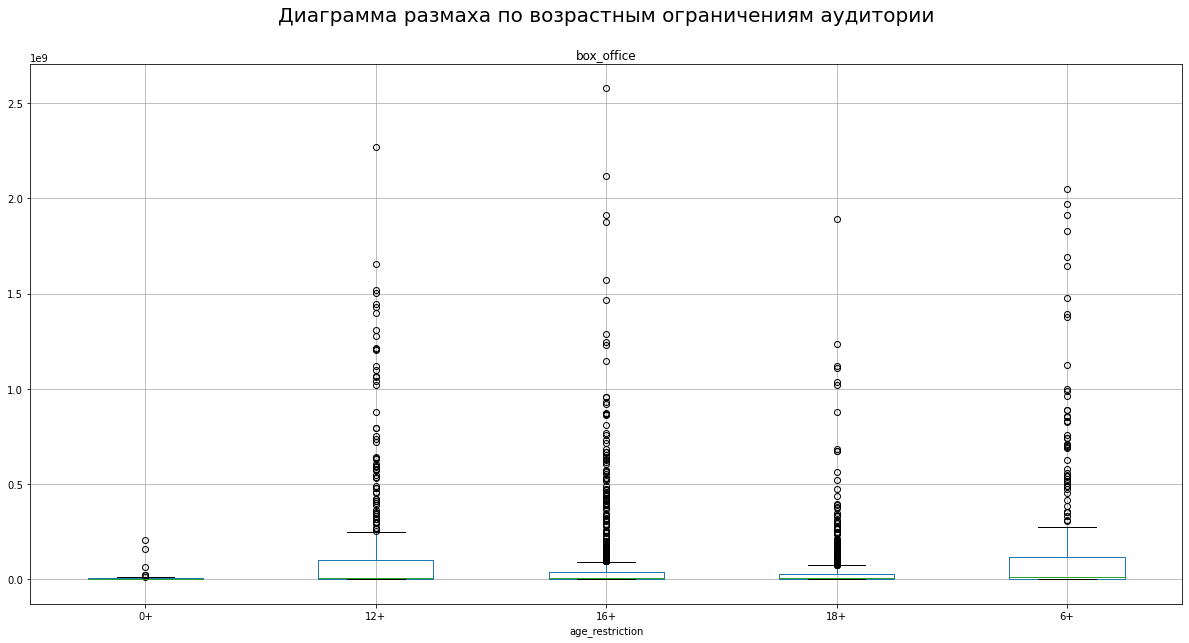

In [88]:
data_15_until_19[data_15_until_19.age_restriction.isin(data_15_until_19.age_restriction.unique())].boxplot('box_office', by='age_restriction',figsize=(20,10));
plt.suptitle('Диаграмма размаха по возрастным ограничениям аудитории\n', fontsize=20)
plt.show()

Для удобства создадим переменные `data_15_19_count` и `data_15_19_sum`, в которых записаны сводные таблицы по годам с 2015 по 2019, высчитывающие количество и сумму общего сбора по возрастным ограничениям аудитории

In [89]:
data_15_19_count = data_15_until_19.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office', aggfunc = ('count'))
display(data_15_19_count)
data_15_19_sum = data_15_until_19.pivot_table(index = 'year', columns = 'age_restriction', values = 'box_office', aggfunc = ('sum'))
data_15_19_sum

age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,36,72,157,116,48
2016,36,77,166,146,67
2017,3,40,120,147,44
2018,5,66,155,179,67
2019,3,83,176,183,79


age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,"273,367,767.78","11,957,220,583.41","8,130,492,733.69","3,184,097,942.98","8,285,538,926.81"
2016,"149,292,921.67","10,721,515,274.39","13,995,064,475.20","4,990,430,064.62","10,650,889,018.24"
2017,"229,598,930.00","7,261,022,595.67","18,233,267,352.06","9,651,495,581.02","9,306,456,001.76"
2018,"32,449,002.11","13,446,763,655.48","14,820,922,307.93","8,760,085,501.15","9,527,605,770.16"
2019,"17,746,066.82","8,888,926,897.35","12,695,283,713.20","10,121,796,303.64","12,017,882,356.27"


Построим столбчатую диаграммы по таблице с количеством фильмов

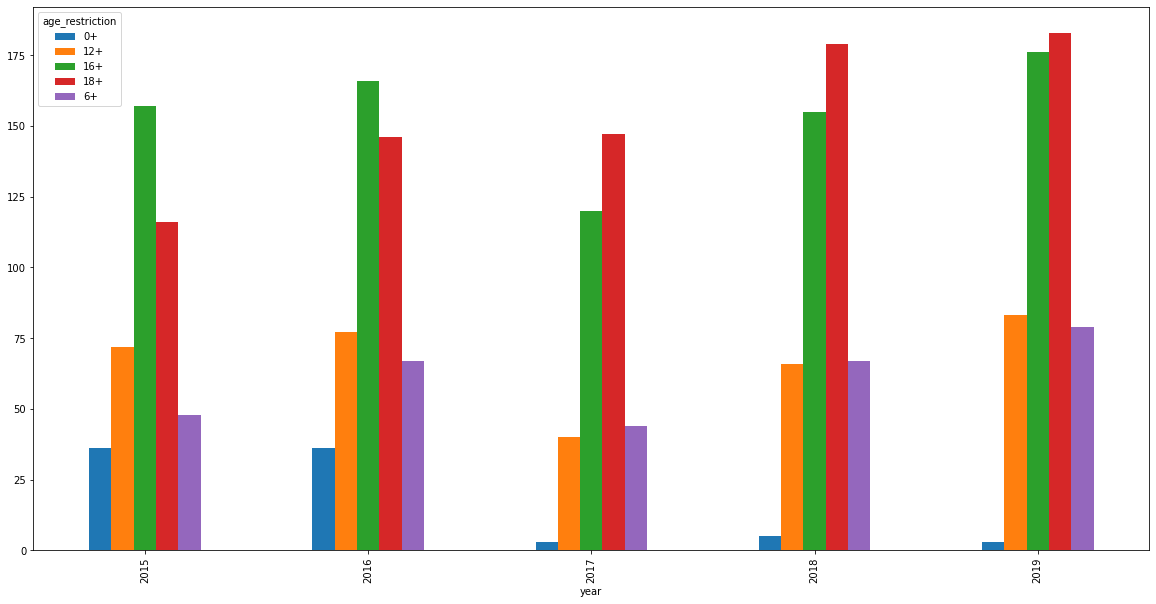

In [90]:
data_15_19_count.plot(kind= 'bar', figsize = (20,10))
plt.show()

По результатам диаграммы можно определить что:
- Самое минимальное количество фильмов на каждый год приходится на аудиторию - `«0+» - для любой зрительской аудитории`
- Самое большое количество фильмов на каждый год выходят для аудиторий `«16+» - для детей старше 16 лет` и `«18+» - запрещено для детей`
- С каждым годом количество фильмов для аудитории `«18+» - запрещено для детей` становится все больше
- С каждым годом количество фильмов для аудитории `«0+» - для любой зрительской аудитории` становится все меньше

Далее построим столбчатую диаграмму для суммы общего сбора

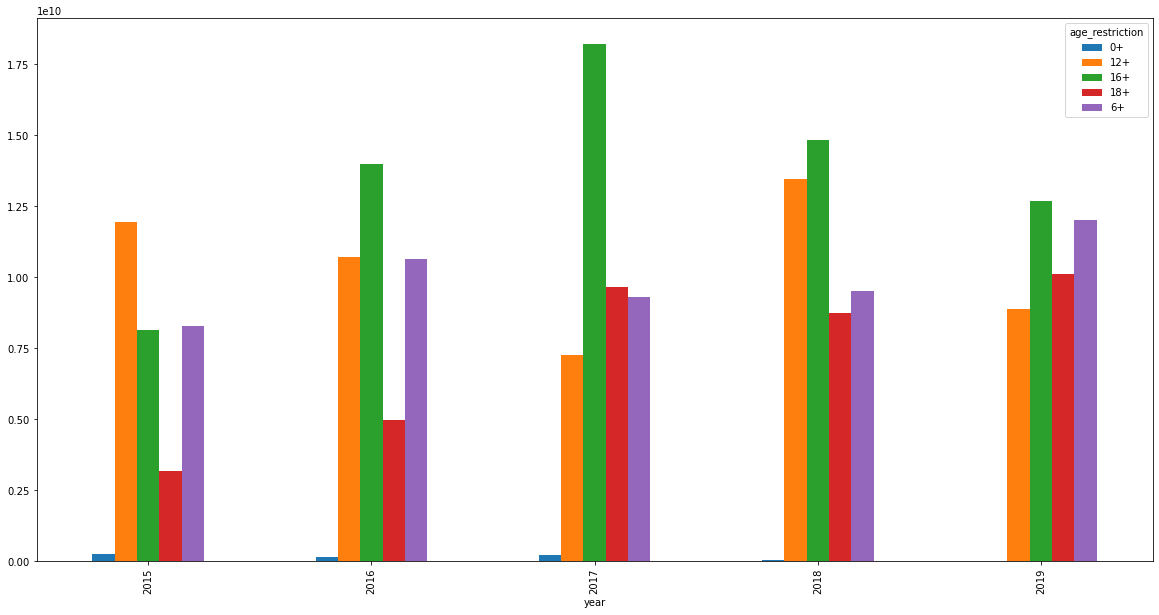

In [91]:
data_15_19_sum.plot(kind= 'bar', figsize = (20,10))
plt.show()

По результатам диаграммы видим, что:
- Фильмы для аудитории `«0+» - для любой зрительской аудитории` минимальный сбор
- С 2016 по 2019 год наибольшую сумму общего сбора собирают фильмы для аудитории `«16+» - для детей старше 16 лет`


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Для облегчения создадим новые столбцы `full_support` в который входят и возвратный и невозвратные средства поддержки, `payback` - в который входит разница возвратного средства поддержки от общего сбора

In [92]:
data['full_support'] = data['refundable_support'] + data['nonrefundable_support']
data['payback'] = data['box_office'] - data['refundable_support']

Далее, сделаем срез по фильмам с господдержкой, для этого сначала  рассмотрим список характеристик

In [93]:
data['full_support'].describe()

count           314.00
mean     49,661,080.00
std      46,796,580.00
min       3,000,000.00
25%      25,000,000.00
50%      35,000,000.00
75%      55,000,000.00
max     500,000,000.00
Name: full_support, dtype: float64

Делаем срез и проверяем

In [94]:
data_support = data.loc[data['full_support'] >= 3000000]
data_support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,main_genre,main_director,support_share,full_support,payback
1162,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",16+,0.00,...,Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,драма,а.атанесян,33.37,"26,500,000.00","365,353.60"
1312,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,12+,0.00,...,Министерство культуры,NaN,NaN,"28,140.00",2014,NaN,а.якимчук,70.00,"26,000,000.00","28,140.00"
1356,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",12+,0.00,...,Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,р.давлетьяров,61.27,"107,847,944.00","19,957,031.50"
1379,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,16+,0.00,...,Министерство культуры,4.20,драма,"55,917.50",2014,драма,е.миндадзе (псевдоним катя шагалова),69.01,"28,000,000.00","55,917.50"
1623,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",16+,0.00,...,Министерство культуры,6.40,драма,"232,100.00",2014,драма,м.угаров,62.48,"25,000,000.00","232,100.00"


Далее рассмотрим сколько выдали средств для поддержки возвратным и невозвратным путем на каждый год

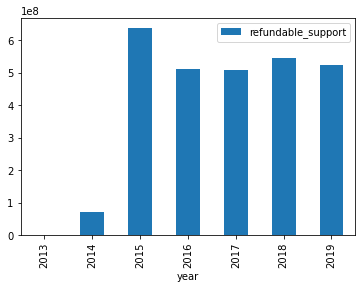

In [95]:
data_support.pivot_table(index = 'year', values = ['refundable_support'], aggfunc = (sum)).plot(kind= 'bar')
plt.show()

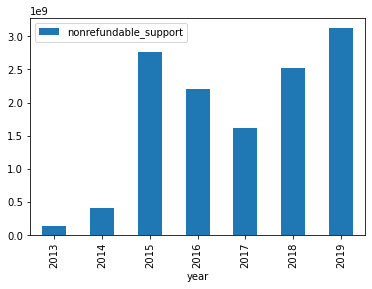

In [96]:
data_support.pivot_table(index = 'year', values = ['nonrefundable_support'], aggfunc = (sum)).plot(kind= 'bar')
plt.show()

По результатам видно, что 
- с 2010 по 2013 год нет возвратной и с 2010 по 2012 нет невозвратной поддержки, отсюда следует что в эти годы не внесены данные о государственных поддержках
- в 2013 - 2014 годах минимальная поддержка, возможно это так же из за потери данных в эти годы как говорилось ранее
- Максимальную возвратную поддержку получили в 2015 году
- Максимальную невозвратную поддержку получили в 2019 году

Рассмотрим какие типы фильмов получали поддержки


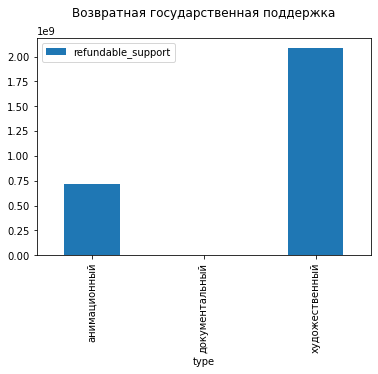

In [97]:
data_support.pivot_table(index = 'type', values = ['refundable_support'], aggfunc = (sum)).plot(kind= 'bar')
plt.title('Возвратная государственная поддержка\n')
plt.show()

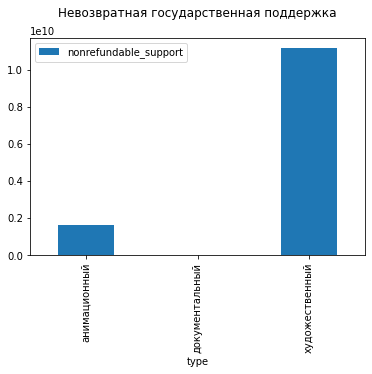

In [98]:
data_support.pivot_table(index = 'type', values = ['nonrefundable_support'], aggfunc = (sum)).plot(kind= 'bar')
plt.title('Невозвратная государственная поддержка\n')
plt.show()

Возвратную и невозвратную поддержку получали только типы:
- `Анимационный`
- `Художественный`

Притом больше получали фильмы типа `Художественный`

Рассмотрим какие фильмы получали максимальную сумму поддержки

In [99]:
data_support['full_support'].describe()

count           314.00
mean     49,661,080.00
std      46,796,580.00
min       3,000,000.00
25%      25,000,000.00
50%      35,000,000.00
75%      55,000,000.00
max     500,000,000.00
Name: full_support, dtype: float64

- Максимальная сумма поддержки - 500000000.0
- Минимальная сумма поддержки - 3000000.0

Выведем наименование, рейтинг фильма и сумму поддержки

In [100]:
data_support[['title', 'ratings', 'full_support', 'payback']].sort_values(by = 'full_support', ascending =False).head(10)

,title,ratings,full_support,payback
6730,вторжение,5.70,"500,000,000.00",NaN
2951,время первых (2017),7.50,"250,000,000.00","469,332,260.00"
4794,салют-7,7.40,"225,000,000.00","752,679,777.00"
3311,большой,8.50,"210,000,000.00","218,578,204.00"
6552,урфин джюс возвращается,6.20,"200,000,000.00","68,549,523.47"
3152,защитники,3.00,"200,000,000.00","212,040,254.00"
4980,рубеж,6.20,"200,000,000.00","87,707,397.08"
5828,т-34,6.50,"180,000,000.00","2,211,754,004.52"
6100,большое путешествие,6.20,"180,000,000.00","87,606,826.51"
2368,савва. сердце воина,4.60,"160,000,000.00","124,487,551.40"


- Фильм с максимальной суммой поддержки является - `"Вторжение"` с рейтингом `5.7`
- Притом не известно окуплся ли фильм `"Вторжение"`
- Из 10ти фильмов с максимальной суммой поддержки, наибольший рейтинг имеет фильм `"Большой"` с рейтингом `8.5`
- Из 10ти фильмов с максимальной суммой поддержки, наибольшую величину по окупаемости имеет фильм `т-34`
- Наименьший рейтинг из топ 10ти фильмов с максимальной суммой поддержки у фильма `"Защитники"` - `3`

### Шаг 5. Напишите общий вывод

В ходе предобработки данных, оказалось много неявных дубликатов и пропусков, без возможности заполнить данными

В результате исследования данных выяснилось:
- Максимальное количество фильмов выходило в 2019-м году
- Минимальное количество фильмов выходило в 2011-м году
- Наибольшую долю занимают фильмы 2018 и 2019го года
- Самое больше количество фильмов выпало на 2018 и 2019-й год. Данные периоды полнее всего представлены в данных, также сюда можно добавить и 2010-й год.
- 2011 и 2017-м годах были резкие падения количества фильмов. Возможно это связано с потерей данных
- Самый высокий общий сбор выпадает на 2017й год
- С 2010 по 2014 год самые минимальные значения, возможно это связано с отсутствием данных в столбце общего сбора
- У фильмов 2018 года хороший общий сбор
- В 2019-м году медианное значение общего сбора упала, что означает что значения общего сбора упали по сравнению с 2018 годом
- Самое минимальное количество фильмов на каждый год приходится на аудиторию - «0+» - для любой зрительской аудитории
- Самое большое количество фильмов на каждый год выходят для аудиторий «16+» - для детей старше 16 лет и «18+» - запрещено для детей
- С каждым годом количество фильмов для аудитории «18+» - запрещено для детей становится все больше
- С каждым годом количество фильмов для аудитории «0+» - для любой зрительской аудитории становится все меньше
- Фильмы для аудитории «0+» - для любой зрительской аудитории минимальный сбор
- С 2016 по 2019 год наибольшую сумму общего сбора собирают фильмы для аудитории «16+» - для детей старше 16 лет
- с 2010 по 2014 год минимальная поддержка, возможно это так же из за потери данных в эти годы как говорилось ранее
- Максимальную возвратную поддержку получили в 2015 году
- Максимальную невозвратную поддержку получили в 2019 году
- Возвратную и невозвратную поддержку получали только типы: Анимационный и Художественный, притом больше получали фильмы типа Художественный
- Максимальная сумма поддержки - 500000000.0
- Минимальная сумма поддержки - 3000000.0
- Фильм с максимальной суммой поддержки является - `"Вторжение"` с рейтингом `5.7`
- Притом не известно окуплся ли фильм `"Вторжение"`
- Из 10ти фильмов с максимальной суммой поддержки, наибольший рейтинг имеет фильм `"Большой"` с рейтингом `8.5`
- Из 10ти фильмов с максимальной суммой поддержки, наибольшую величину по окупаемости имеет фильм `т-34`
- Наименьший рейтинг из топ 10ти фильмов с максимальной суммой поддержки у фильма `"Защитники"` - `3`
- Значения столбца `box_office` имеют сильный разброс данных, то есть имеются фильмы с большим значением общего сбора, которые сильно превышают и выбираются от остальных значений общего сбора
- Самая минимальная доля фильмов с указанной информацией была в 2010 году
- Полнее всего представлена информация о прокате в кинотеатрах в 2017 году
- В течении с 2010 по 2017 год доля указанной информация о прокате фильмов в кинотеатрах с каждым годом росла
- В 2017 году доля резко упала, возможно это из за потери данных
- Максимальную сумму общего сбора получили в 2018 году
- Минимальную сумму общего сбора получили в 2010 году, вполне возможно это из за низкого значения количества фильмов этого года, а также и низкой доли фильмов с указанной информацией о прокате фильма